In [1]:
# Previously, we applied EWMA using just one smoothing factor alpha.
# Thus, EWMA(or Simple Exponential Smoothing) failed to account for other contributing factors like Trend and seasonality.

In [4]:
# Holt Winters seasonal method comprises of forecast equation and 3 additional smoothing equations.
# one for the level(l_t), one for the trend(b_t), and one for the seasonality(s_t), with corresponding smoothing params alpha, beta, gamma.

In [7]:
# Note: There are 2 variants to this method that differ with the nature of seasonal component i.e. Additive and Multiplicative method.
# We are already familiar, that the additive method is preffered when the seasonal variations
# are roughly constant throughout the series, while the multiplicative method is preffered when
# the seasonal variations are changing proportional to the level of the series.

In [ ]:
# We have already learned about the Single exponential smoothing using single smoothing parameter "alpha" on ewm() method!

In [10]:
# Lets explore Holt and Winters method, which allows us to add on double and triple exponential smoothing.
# In Holts method (aka double exponential smoothing), another parameter called Beta is introduced which addresses Trend component!(Maths in Diary)
# In Holt-Winters method (aka Triple Exponential Smoothing)another parameter called gamma is introduced which addresses seasonality component!(Maths in Diary)

In [12]:
# Firstly, lets start by fitting the Holt Winters method using statsmodel to an underlying dataset
# Post which, we will check forecasting using it!

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline

In [25]:
df = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Airlines.csv", index_col=0, parse_dates=True)

In [26]:
df.shape

(144, 1)

In [23]:
# please ensure that none of the rows have any nan values, otherwise fix it!

In [27]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [28]:
# We need to tell statsmodel that there is a freq in our data,
# By default, freq = None is set!

In [29]:
df.index.freq= 'MS' # MS represents string code of "month start"

In [30]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [31]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [33]:
# Lets first see Single exponential smoothing or Simple Exponential Smoothing:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [34]:
span = 12
alpha = 2/(span+1)

In [47]:
# Firstly, simply running Exponential Weighted Moving Average!
df['EWMA_12']=df['Passengers'].ewm(alpha=alpha, adjust= False).mean()

In [37]:
df.head()

,Passengers,EWMA_12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


### Now, lets run the Simple Exponential Smoothing model and check the results.


In [38]:
model = SimpleExpSmoothing(df['Passengers'])
# Note for this line to work we need to set the freq of the DateTimeIndex based on freq of dataset. eg: here we have freq = "MS" i.e. Month Start

In [40]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
# alpha is the value of the Simple Exponential Smoothing.

In [44]:
df['SES_12']=fitted_model.fittedvalues.shift(-1)
# Shifting of rows by one layer is performed bcoz SES somehow includes the value in 1st row twice!

In [45]:
df.head()

,Passengers,EWMA_12,SES_12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [46]:
# We can observe that Single exponential Smoothing do exactly the same thing as Exponential Weighted Moving Average!

In [48]:
# Till now, we have covered Simple Exponential Smoothing!

In [49]:
# Lets move on and Check Holt-Winter's Method:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

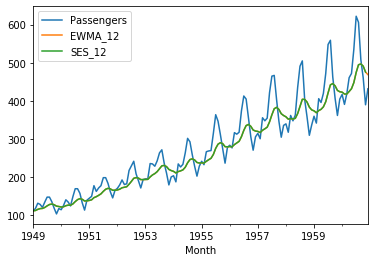

In [51]:
df.plot()

### Double exponential smoothing model in a single line, fitting it and storing it as a column in a df

In [53]:
df['DES_HWM_additive_12'] = ExponentialSmoothing(df['Passengers'], trend='add').fit().fittedvalues.shift(-1)
# Intuitively via graph, its hard to say if the trend is perfectly linear or getting bit curvy while growing, so, initially assuming linear, using additive.

In [54]:
df.head()

,Passengers,EWMA_12,SES_12,DES_HWM_additive_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237762
1949-02-01,118,112.923077,112.923077,120.237762
1949-03-01,132,115.857988,115.857988,134.237762
1949-04-01,129,117.879836,117.879836,131.237762
1949-05-01,121,118.359861,118.359861,123.237762


In [55]:
df.columns

Index(['Passengers', 'EWMA_12', 'SES_12', 'DES_HWM_additive_12'], dtype='object')

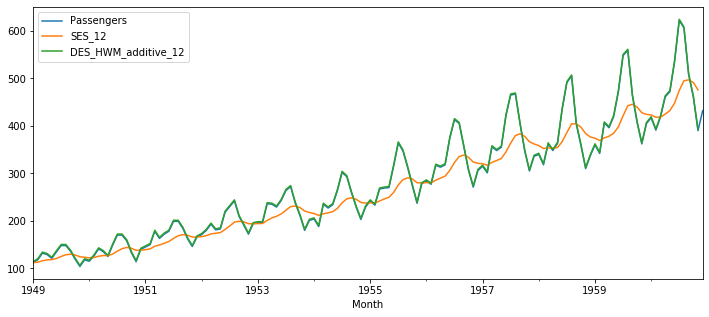

In [57]:
df[['Passengers', 'SES_12', 'DES_HWM_additive_12']].plot(figsize=(12,5))

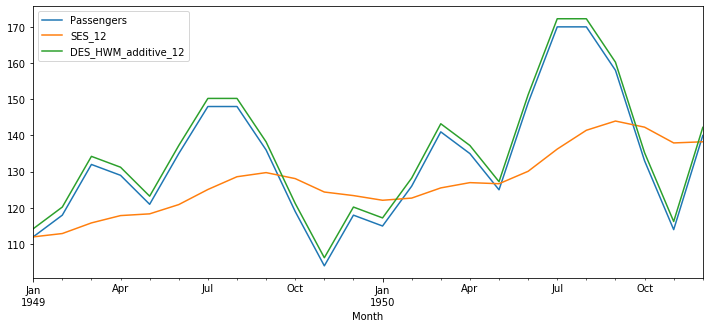

In [60]:
# Note: We can observe, the Passengers and DES_HWM_additive_12 are very closely aligned with each other!
# We can observe it clearly for a smaller interval as:
df[['Passengers', 'SES_12', 'DES_HWM_additive_12']].iloc[:24].plot(figsize=(12,5))

### Thus, we saw, just by adding trend parameter we were able to describe the time series pretty well!

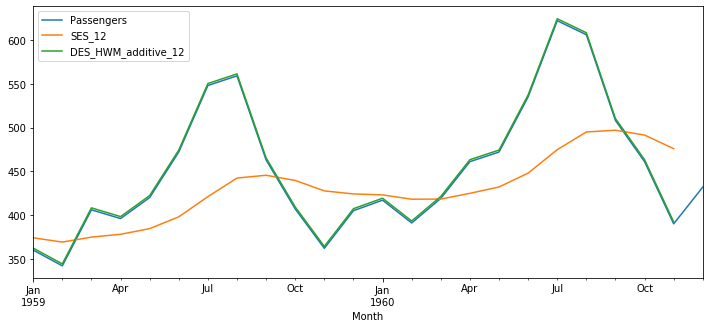

In [61]:
df[['Passengers', 'SES_12', 'DES_HWM_additive_12']].iloc[-24:].plot(figsize=(12,5))

In [62]:
### Also, we can see the most recent data is fitted pretty well with the model.

In [64]:
# If you remeber, we have used trend="add", but with Airlines dataset its hard to tell if its perfectly additive or multiplicative,
# So, lets test multiplicative as well:

df['DES_HWM_multi_12'] = ExponentialSmoothing(df['Passengers'],trend="mul").fit().fittedvalues.shift(-1)

In [65]:
df.head()

,Passengers,EWMA_12,SES_12,DES_HWM_additive_12,DES_HWM_multi_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237762,112.049247
1949-02-01,118,112.923077,112.923077,120.237762,118.051885
1949-03-01,132,115.857988,115.857988,134.237762,132.058041
1949-04-01,129,117.879836,117.879836,131.237762,129.056722
1949-05-01,121,118.359861,118.359861,123.237762,121.053204


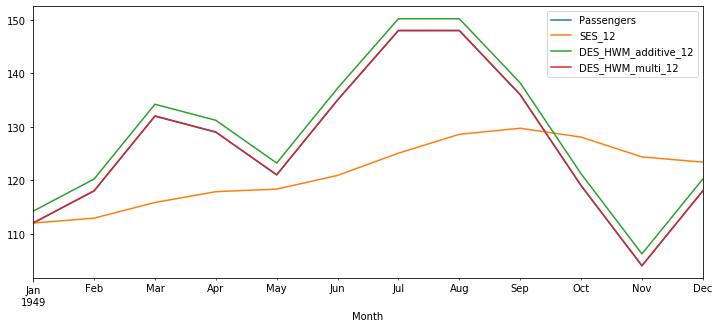

In [67]:
df[['Passengers', 'SES_12', 'DES_HWM_additive_12','DES_HWM_multi_12']].iloc[:12].plot(figsize=(12,5))

In [69]:
## We can observe, the multiplicative trend is better describing time series, as its not only fitting recent data, but also the oldest data!

### Triple exponential smoothing model in a single line, fitting it and storing it as a column in a df:

In [70]:
# Triple Exponential Smoothing, as we know, adds support for both the Trend and seasonality in the data.

In [77]:
df['TES_HWM_multi_12'] = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [78]:
df.head()

,Passengers,EWMA_12,SES_12,DES_HWM_additive_12,DES_HWM_multi_12,TES_HWM_multi_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237762,112.049247,111.608110
1949-02-01,118,112.923077,112.923077,120.237762,118.051885,118.853687
1949-03-01,132,115.857988,115.857988,134.237762,132.058041,133.343675
1949-04-01,129,117.879836,117.879836,131.237762,129.056722,127.912641
1949-05-01,121,118.359861,118.359861,123.237762,121.053204,120.991626


In [79]:
df.columns

Index(['Passengers', 'EWMA_12', 'SES_12', 'DES_HWM_additive_12',
       'DES_HWM_multi_12', 'TES_HWM_multi_12'],
      dtype='object')

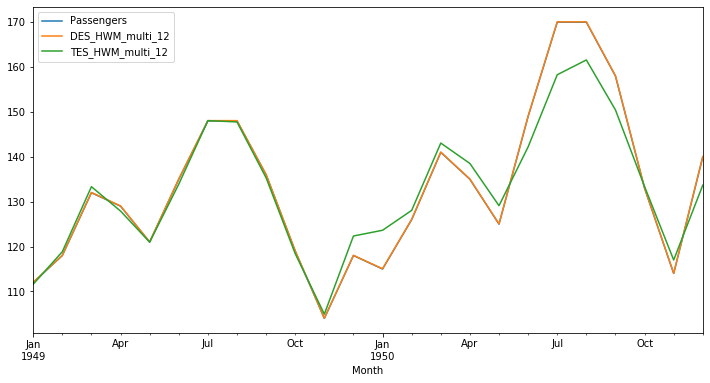

In [83]:
df[['Passengers','DES_HWM_multi_12','TES_HWM_multi_12']].iloc[:24].plot(figsize=(12,6))

In [88]:
# For the initial months, we observed that, Triple exponential smoothing is not able to explain the time series as good as its explained by Double exponential smoothing!
# Lets check how the DES and TES is performing for the recent observations:

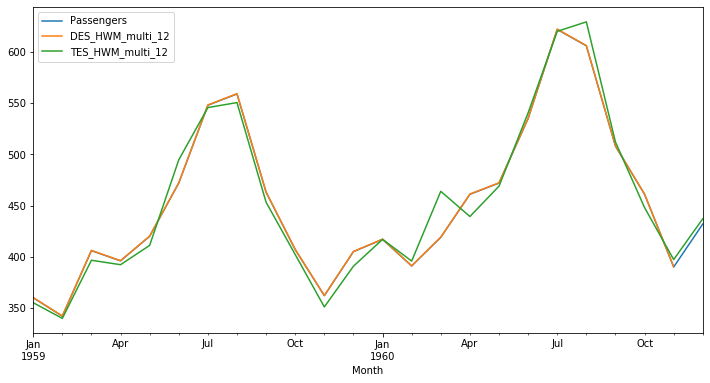

In [85]:
df[['Passengers','DES_HWM_multi_12','TES_HWM_multi_12']].iloc[-24:].plot(figsize=(12,6))

In [89]:
# But with the latest observations i.e. recent data, we can see the green line i.e. TES_HWM_multi_12 starts to fit better and better to the blue line i.e. the real data
# Thus, eventually for forecasting it will be a better call to use TES_HWM_multi_12, coz we want the ability to predict fluctuating seasonality patterns which will greatly improve forecasting!

In [ ]:
# Thus, we got the general idea to use statsmodels to fit the data and later on, we will create predictions

In [87]:
# Whats next, is we need to do forecasting!